In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Step 1: Fetch the webpage
url = "https://www.worldometers.info/world-population/population-by-country/"
response = requests.get(url)



In [4]:
# Check if the page was fetched successfully
if response.status_code != 200:
    raise Exception(f"Failed to fetch page. Status code: {response.status_code}")

# Step 2: Parse the HTML content and locate the table
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')




In [5]:
# Step 3: Convert the HTML table into a DataFrame
df = pd.read_html(str(table))[0]

# Step 4: Rename columns for clarity
df.columns = ['Rank', 'Country', 'Population', 'Yearly Change (%)', 'Net Change',
              'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
              'Fertility Rate', 'Median Age', 'Urban Population (%)', 'World Share (%)']

# Step 5: Basic Cleaning
df['Population'] = df['Population'].replace({',': ''}, regex=True).astype(int)  # Convert Population to integer



C:\Users\GRINCH\AppData\Local\Temp\ipykernel_27168\2227045094.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [6]:
# Step 6: Display basic information
print("Columns in the table:")
print(df.columns)
print("Preview of the data:")
print(df.head())



Columns in the table:
Index(['Rank', 'Country', 'Population', 'Yearly Change (%)', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fertility Rate', 'Median Age', 'Urban Population (%)',
       'World Share (%)'],
      dtype='object')
Preview of the data:
   Rank        Country  Population Yearly Change (%)  Net Change  \
0     1          India  1450935791            0.89 %    12866195   
1     2          China  1419321278           -0.23 %    -3263655   
2     3  United States   345426571            0.57 %     1949236   
3     4      Indonesia   283487931            0.82 %     2297864   
4     5       Pakistan   251269164            1.52 %     3764669   

   Density (P/Km²)  Land Area (Km²)  Migrants (net)  Fertility Rate  \
0              488          2973190         -630830             2.0   
1              151          9388211         -318992             1.0   
2               38          9147420         1286132             1.6   
3             

In [7]:
# Step 7: Top 10 most populated countries
top_10 = df.nlargest(10, 'Population')
print("Top 10 most populated countries:")
print(top_10)



Top 10 most populated countries:
   Rank        Country  Population Yearly Change (%)  Net Change  \
0     1          India  1450935791            0.89 %    12866195   
1     2          China  1419321278           -0.23 %    -3263655   
2     3  United States   345426571            0.57 %     1949236   
3     4      Indonesia   283487931            0.82 %     2297864   
4     5       Pakistan   251269164            1.52 %     3764669   
5     6        Nigeria   232679478            2.10 %     4796533   
6     7         Brazil   211998573            0.41 %      857844   
7     8     Bangladesh   173562364            1.22 %     2095374   
8     9         Russia   144820423           -0.43 %     -620077   
9    10       Ethiopia   132059767            2.62 %     3368075   

   Density (P/Km²)  Land Area (Km²)  Migrants (net)  Fertility Rate  \
0              488          2973190         -630830             2.0   
1              151          9388211         -318992             1.0   
2    

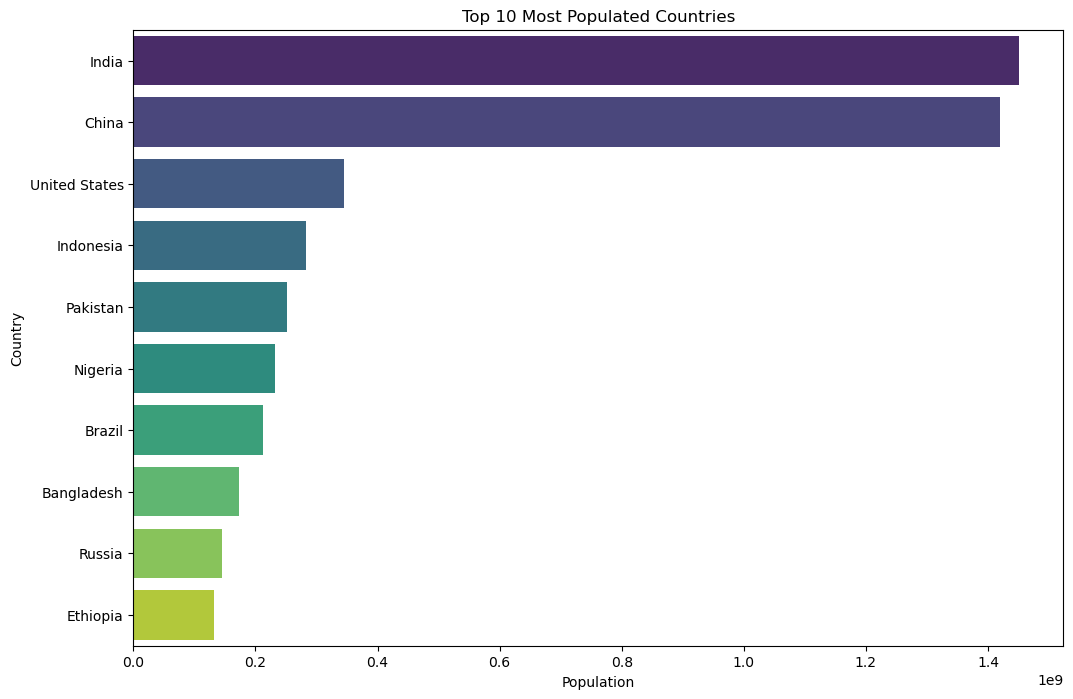

In [8]:
# Step 8: Visualization - Bar chart of the top 10 most populated countries
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10, x='Population', y='Country', palette='viridis')
plt.title('Top 10 Most Populated Countries')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()



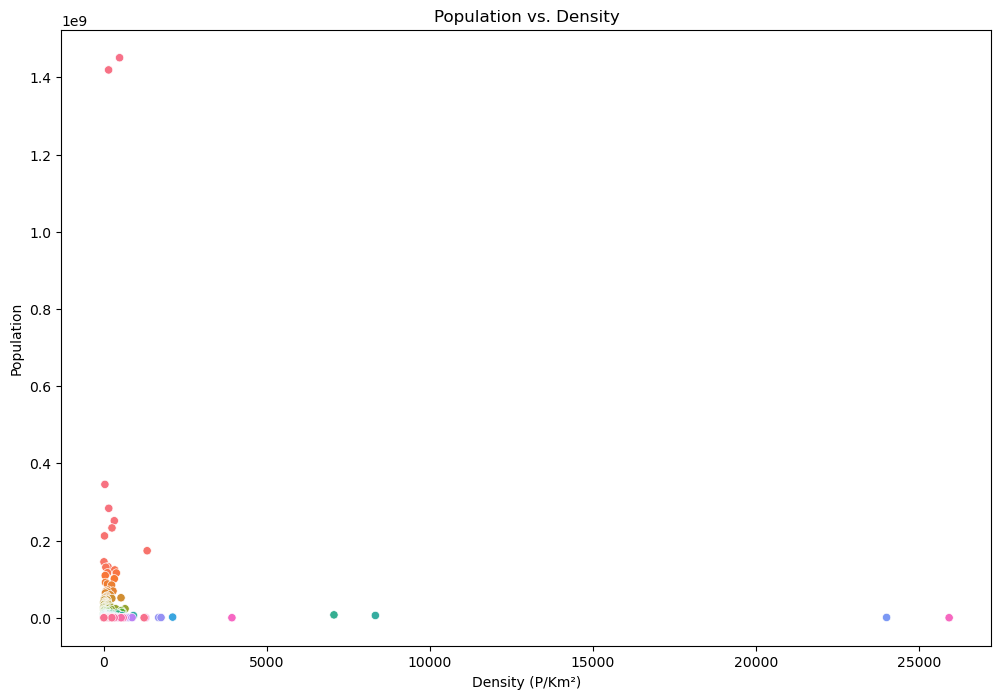

In [9]:
# Step 9: Visualization - Scatter plot of Population vs. Density
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Density (P/Km²)', y='Population', hue='Country', legend=False)
plt.title('Population vs. Density')
plt.xlabel('Density (P/Km²)')
plt.ylabel('Population')
plt.show()